In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torchvision.utils

from torch.utils.data import DataLoader

import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_data = dsets.CIFAR10(root='./data', 
                           train=True,
                           download=True, 
                           transform=transforms.ToTensor())

test_data  = dsets.CIFAR10(root='./data', 
                           train=False,
                           download=True, 
                           transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [4]:
batch_size = 128

train_loader = DataLoader(train_data, 
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(test_data, 
                         batch_size=5,
                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

In [5]:
def imshow(img, title):
    img = torchvision.utils.make_grid(img, normalize=True)
    npimg = img.numpy()
    fig = plt.figure(figsize = (5, 15))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

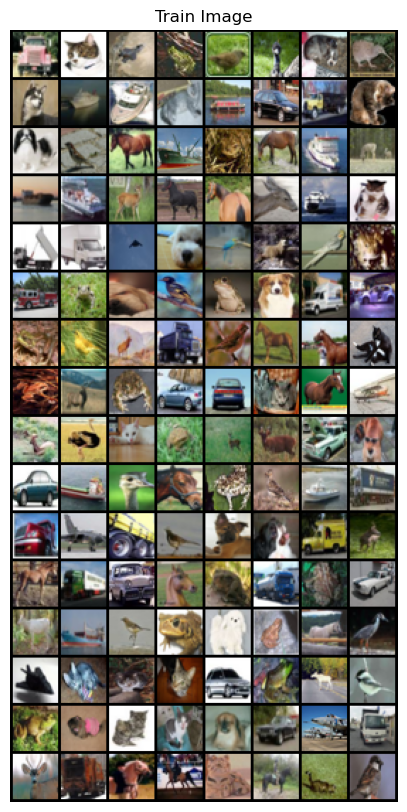

In [6]:
train_iter = iter(train_loader)
images, labels = next(iter(train_loader)) #train_iter.next()

imshow(images, "Train Image")

In [7]:
images.shape

torch.Size([128, 3, 32, 32])

# Train and Evaluate CNN

### Train cnn

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv_layer = nn.Sequential(
            nn.Conv2d(3, 32, 5),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32, 64, 5),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )

        self.fc_layer = nn.Sequential(
            nn.Linear(64*5*5, 100),
            nn.ReLU(),
            nn.Linear(100, 10)              
        )
        
    def forward(self, x):
        out = self.conv_layer(x)
        out = out.view(-1, 64*5*5)
        out = self.fc_layer(out)
        
        return out
    
model = CNN()

In [9]:
print(torch.cuda.is_available())

False


In [10]:
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [11]:
num_epochs = 10

In [13]:
for epoch in range(num_epochs):

    total_batch = len(train_data) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images
        Y = batch_labels

        pre = model(X)
        cost = loss(pre, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if (i+1) % 200 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))

Epoch [1/10], lter [200/390], Loss: 2.2964
Epoch [2/10], lter [200/390], Loss: 2.2089
Epoch [3/10], lter [200/390], Loss: 1.9810
Epoch [4/10], lter [200/390], Loss: 1.8246
Epoch [5/10], lter [200/390], Loss: 1.7796
Epoch [6/10], lter [200/390], Loss: 1.8352
Epoch [7/10], lter [200/390], Loss: 1.7561
Epoch [8/10], lter [200/390], Loss: 1.5445
Epoch [9/10], lter [200/390], Loss: 1.6690
Epoch [10/10], lter [200/390], Loss: 1.4122


In [19]:
correct = 0
total = 0

for images, labels in test_loader:
    
    #images = images
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

Accuracy of test images: 47.000000 %


Predicted:   frog  ship   car  ship  frog


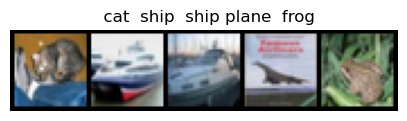

In [20]:
images, labels = next(iter(test_loader))   
outputs = model(images)

_, predicted = torch.max(outputs.data, 1)
    
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(5)))

title = (' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(images, title)

In [21]:
transform = transforms.Compose([
    # Data Augmentation
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Resize(32),
    
    # Data Nomalization
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

# Normalize a tensor image with mean and standard deviation.
# Given mean: (M1,...,Mn) and std: (S1,..,Sn) for n channels,
# this transform will normalize each channel of the input torch.
# *Tensor i.e. input[channel] = (input[channel] - mean[channel]) / std[channel]

train_data = dsets.CIFAR10(root='./data', 
                           train=True,
                           download=True, 
                           transform=transform)

test_data  = dsets.CIFAR10(root='./data', 
                           train=False,
                           download=True, 
                           transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [22]:
batch_size = 128

train_loader = DataLoader(train_data, 
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(test_data, 
                         batch_size=batch_size,
                         shuffle=False)

In [23]:
import torch.nn.init as init

In [25]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv_layer = nn.Sequential(
            nn.Conv2d(3, 32, 5),
            
            # Batch Nomalization
            nn.BatchNorm2d(32),
            
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32, 64, 5),
            
            # Batch Nomalization
            nn.BatchNorm2d(64),
            
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )

        self.fc_layer = nn.Sequential(
            nn.Linear(64 * 5 * 5, 100),
            # Dropout
            # nn.Dropout(0.5)
            nn.ReLU(),
            nn.Linear(100, 10)              
        )
        
        # Weight Initialization
        for m in self.modules() :
            if isinstance(m, nn.Conv2d):
                # init.xavier_normal(m.weight.data)
                init.kaiming_normal_(m.weight.data)
                m.bias.data.fill_(0)      
            if isinstance(m, nn.Linear):
                # init.xavier_normal(m.weight.data)
                init.kaiming_normal_(m.weight.data)
                m.bias.data.fill_(0)                
        
    def forward(self, x):
        out = self.conv_layer(x)
        out = out.view(-1, 64*5*5)
        out = self.fc_layer(out)
        
        return out
    
model = CNN()

In [26]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Momentum & Weight Regularization(L2)
# optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, weight_decay=1e-5)

In [27]:
num_epochs = 10

In [29]:
for epoch in range(num_epochs):

    total_batch = len(train_data) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images
        Y = batch_labels

        pre = model(X)
        cost = loss(pre, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if (i+1) % 200 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))

Epoch [1/10], lter [200/390], Loss: 1.0538
Epoch [2/10], lter [200/390], Loss: 1.1867
Epoch [3/10], lter [200/390], Loss: 0.9404
Epoch [4/10], lter [200/390], Loss: 0.9544
Epoch [5/10], lter [200/390], Loss: 0.8161
Epoch [6/10], lter [200/390], Loss: 0.6822
Epoch [7/10], lter [200/390], Loss: 0.7074
Epoch [8/10], lter [200/390], Loss: 0.6951
Epoch [9/10], lter [200/390], Loss: 0.5607
Epoch [10/10], lter [200/390], Loss: 0.6686


In [32]:
# 이제부터는 꼭 해주어야함.
# Batch Norm과 Dropout은 Train과 Test일 때 서로 다르게 행동함.
model.eval()

# 반대로 다시 Train을 해야하면
# model.train()

correct = 0
total = 0

for images, labels in test_loader:
    
    images = images
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

Accuracy of test images: 74.920000 %


# Transfer Learning

In [33]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(277),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), # ToTensor : [0, 255] -> [0, 1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((277, 277)),
    transforms.ToTensor(), # ToTensor : [0, 255] -> [0, 1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [34]:
train_data = dsets.CIFAR10(root='./data', 
                           train=True,
                           download=True, 
                           transform=transforms.ToTensor())

test_data  = dsets.CIFAR10(root='./data', 
                           train=False,
                           download=True, 
                           transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [35]:
batch_size = 128

train_loader = DataLoader(train_data, 
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(test_data, 
                         batch_size=batch_size,
                         shuffle=False)

In [36]:
model = torchvision.models.vgg16(pretrained=True)

C:\Users\jshon\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jshon\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\jshon/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|███████████████████████████████████████████████████████████████████████████████| 528M/528M [00:47<00:00, 11.5MB/s]


In [37]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [38]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [40]:
# for parameter in model.parameters():
#     parameter.requires_grad = False
model.classifier[-1] = nn.Linear(in_features=4096, out_features=10, bias=True)

# model.classifier[-1] = nn.Sequantial(
#     nn.Linear(in_features=4096, out_features=512, bias=True),
#     nn.ReLU(),
#     nn.Linear(in_features=512, out_features=10, bias=True),
# ).cuda()

In [41]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Momentum & Weight Regularization(L2)
# optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, weight_decay=1e-5)

In [42]:
num_epochs = 10

In [44]:
model.train()

for epoch in range(num_epochs):

    total_batch = len(train_data) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images
        Y = batch_labels

        pre = model(X)
        cost = loss(pre, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if (i+1) % 200 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))

Epoch [1/10], lter [200/390], Loss: 0.5686
Epoch [2/10], lter [200/390], Loss: 0.4206


KeyboardInterrupt: 

In [ ]:
model.eval()
correct = 0
total = 0

for images, labels in test_loader:
    
    images = images.cuda()
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += labels.size(0)
    correct += (predicted == labels.cuda()).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))